<a href="https://colab.research.google.com/github/aleynasvml/GMKA_Aleyna_Sevimli/blob/main/Odev3_Python_Veri_Analizi_Egitimi__ogrenci_aleyna_sevimli_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Güney Marmara ve TRAI
# <center> Python Veri Analizi Eğitimi
# <center> Ödev 3

### 2021 EUR/TRY Kur_21 tablosunun incelenmesi

In [1]:
import yfinance as yf 
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Kur_21 = yf.download('EURTRY=X',start='2021-01-01',end = '2021-12-31')


[*********************100%***********************]  1 of 1 completed


In [2]:
Kur_21.head()
print(Kur_21.head())
print('******************************************************')
Kur_21.info()
print(Kur_21.info())
print('******************************************************')
Kur_21.describe()


               Open     High      Low    Close  Adj Close  Volume
Date                                                             
2021-01-01  9.08470  9.08470  9.08470  9.08470    9.08470       0
2021-01-04  9.11047  9.11154  8.99617  9.10568    9.10568       0
2021-01-05  9.09273  9.11239  9.04298  9.08882    9.08882       0
2021-01-06  9.08044  9.09500  8.92864  9.08177    9.08177       0
2021-01-07  9.00475  9.07176  8.88154  9.00614    9.00614       0
******************************************************
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2021-01-01 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       260 non-null    float64
 1   High       260 non-null    float64
 2   Low        260 non-null    float64
 3   Close      260 non-null    float64
 4   Adj Close  260 non-null    float64
 5   Volume     260 non-null    int64  
dtypes: float64(5), int64(1)
memory usag

,Open,High,Low,Close,Adj Close,Volume
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.0
mean,10.434622,10.573510,10.347226,10.439140,10.439140,0.0
std,1.754535,1.940096,1.688033,1.753083,1.753083,0.0
min,8.386340,8.464750,8.354830,8.387260,8.387260,0.0
25%,9.621848,9.695410,9.550110,9.629247,9.629247,0.0
50%,10.088800,10.146105,10.047840,10.089370,10.089370,0.0
75%,10.439128,10.471000,10.358152,10.442483,10.442483,0.0
max,18.671040,20.733000,18.657669,18.655109,18.655109,0.0


In [3]:
Kur_21 = Kur_21[['Adj Close']]
Kur_21.columns = ['Kapanış (TRY)']
Kur_21


,Kapanış (TRY)
Date,
2021-01-01,9.08470
2021-01-04,9.10568
2021-01-05,9.08882
2021-01-06,9.08177
2021-01-07,9.00614
...,...
2021-12-24,12.79752
2021-12-27,12.23056
2021-12-28,13.05254


In [4]:
norm = Kur_21.iloc[0,0]
Kur_21['Normalize  EUR/TRY'] = Kur_21['Kapanış (TRY)']/norm
Kur_21

<ipython-input-4-30d30e085180>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kur_21['Normalize  EUR/TRY'] = Kur_21['Kapanış (TRY)']/norm


,Kapanış (TRY),Normalize EUR/TRY
Date,,
2021-01-01,9.08470,1.000000
2021-01-04,9.10568,1.002309
2021-01-05,9.08882,1.000454
2021-01-06,9.08177,0.999678
2021-01-07,9.00614,0.991353
...,...,...
2021-12-24,12.79752,1.408689
2021-12-27,12.23056,1.346281
2021-12-28,13.05254,1.436761


# *BIST30 endeksinin 2021 yılı sonunda 1.5 katına çıkmıştır.*

In [5]:
fig_1 = px.line(Kur_21,y=Kur_21['Normalize  EUR/TRY'] ,
                width = 1000,
                height=500,
                title='Kur Endeksi 2021 - Normalize(1 Ocak 2021)',
                hover_data={'Normalize  EUR/TRY' : ':.2f','Kapanış (TRY)' : ':.0f'},
                labels={'Date': 'Tarih','Normalize  EUR/TRY ':'Kur Endeksi(EUR/TRY)'})


fig_2 = go.Figure()
fig_2.add_trace(go.Bar(x=Kur_21.index,y=Kur_21['Normalize  EUR/TRY']))
fig_2.update_layout(title = 'Kur Endeksi 2021 - Normalize(1 Ocak 2021)',
                   xaxis_title='Tarih',xaxis_dtick='M1',
                   yaxis_title='Kur Endeksi(EUR/TRY)',
                   width=1000, height=500)


fig_1.show()
fig_2.show()


### 2021 ve 2022 değerlerini birlikte inceleme

In [6]:
indirme_list= ['XU030.IS','EURTRY=X']

veri_2022=pd.DataFrame()

for i in indirme_list :
  data=yf.download(i,start='2022-01-01',end='2022-12-31')
  data = data['Adj Close'].rename(i)
  veri_2022=pd.concat([veri_2022,data],axis=1)

veri_2022.columns = ['Kapanış (TRY)','EUR/TRY']
veri_2022 = veri_2022[veri_2022['Kapanış (TRY)']>0]
norm = veri_2022.iloc[0,0]
norm2 = veri_2022.iloc[0,1]
veri_2022['Normalize'] = veri_2022['Kapanış (TRY)']/norm
veri_2022['Normalize EUR/TRY'] = veri_2022['EUR/TRY']/norm2
veri_2022['degisim'] = veri_2022['Normalize'].diff(1)
veri_2022['degisim%'] =( veri_2022['degisim']/veri_2022['Normalize'].shift(1))*100
veri_2022['d_yon'] = veri_2022['degisim'].map(lambda x : 'dusen gun' if x < 0 else'yukselen gun')
veri_2022




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Kapanış (TRY),EUR/TRY,Normalize,Normalize EUR/TRY,degisim,degisim%,d_yon
2022-01-03,2109.500000,15.189530,1.000000,1.000000,NaN,NaN,yukselen gun
2022-01-04,2157.000000,14.763000,1.022517,0.971919,0.022517,2.251718,yukselen gun
2022-01-05,2212.300049,15.071520,1.048732,0.992231,0.026215,2.563748,yukselen gun
2022-01-06,2219.600098,15.445910,1.052193,1.016879,0.003461,0.329976,yukselen gun
2022-01-07,2256.600098,15.434040,1.069732,1.016097,0.017540,1.666967,yukselen gun
...,...,...,...,...,...,...,...
2022-12-23,5885.200195,19.791670,2.789856,1.302981,0.000948,0.033995,yukselen gun
2022-12-27,5876.700195,19.815269,2.785826,1.304535,-0.004029,-0.144430,dusen gun
2022-12-28,5789.399902,19.805389,2.744442,1.303884,-0.041384,-1.485533,dusen gun
2022-12-29,5915.200195,19.867519,2.804077,1.307975,0.059635,2.172942,yukselen gun


In [7]:
veri_2021=pd.DataFrame()

for i in indirme_list :
  data=yf.download(i,start='2021-01-01',end='2021-12-31')
  data = data['Adj Close'].rename(i)
  veri_2021=pd.concat([veri_2021,data],axis=1)


veri_2021.columns = ['Kapanış (TRY)','EUR/TRY']
veri_2021 = veri_2021[veri_2021['Kapanış (TRY)']>0]
norm = veri_2021.iloc[0,0]
veri_2021.iloc[0,0]
norm2 = veri_2021.iloc[0,1]
veri_2021['Normalize'] = veri_2021['Kapanış (TRY)']/norm
veri_2021['Normalize EUR/TRY'] = veri_2021['EUR/TRY']/norm2
veri_2021['degisim'] = veri_2021['Normalize'].diff(1)
veri_2021['degisim%'] =( veri_2021['degisim']/veri_2021['Normalize'].shift(1))*100
veri_2021['d_yon'] = veri_2021['degisim'].map(lambda x : 'dusen gun' if x < 0 else'yukselen gun')
veri_2021


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Kapanış (TRY),EUR/TRY,Normalize,Normalize EUR/TRY,degisim,degisim%,d_yon
2021-01-04,1652.900024,9.10568,1.000000,1.000000,NaN,NaN,yukselen gun
2021-01-05,1640.400024,9.08882,0.992438,0.998148,-0.007562,-0.756247,dusen gun
2021-01-06,1657.699951,9.08177,1.002904,0.997374,0.010466,1.054616,yukselen gun
2021-01-07,1678.199951,9.00614,1.015306,0.989068,0.012402,1.236653,yukselen gun
2021-01-08,1694.400024,8.99850,1.025107,0.988229,0.009801,0.965324,yukselen gun
...,...,...,...,...,...,...,...
2021-12-24,2086.800049,12.79752,1.262508,1.405444,0.061831,5.149656,yukselen gun
2021-12-27,2089.399902,12.23056,1.264081,1.343179,0.001573,0.124586,yukselen gun
2021-12-28,2032.900024,13.05254,1.229899,1.433450,-0.034182,-2.704120,dusen gun
2021-12-29,2086.300049,13.35252,1.262206,1.466395,0.032307,2.626790,yukselen gun


In [8]:
veriBirlesik=pd.concat([veri_2021,veri_2022],axis=0)
veriBirlesik

,Kapanış (TRY),EUR/TRY,Normalize,Normalize EUR/TRY,degisim,degisim%,d_yon
2021-01-04,1652.900024,9.105680,1.000000,1.000000,NaN,NaN,yukselen gun
2021-01-05,1640.400024,9.088820,0.992438,0.998148,-0.007562,-0.756247,dusen gun
2021-01-06,1657.699951,9.081770,1.002904,0.997374,0.010466,1.054616,yukselen gun
2021-01-07,1678.199951,9.006140,1.015306,0.989068,0.012402,1.236653,yukselen gun
2021-01-08,1694.400024,8.998500,1.025107,0.988229,0.009801,0.965324,yukselen gun
...,...,...,...,...,...,...,...
2022-12-23,5885.200195,19.791670,2.789856,1.302981,0.000948,0.033995,yukselen gun
2022-12-27,5876.700195,19.815269,2.785826,1.304535,-0.004029,-0.144430,dusen gun
2022-12-28,5789.399902,19.805389,2.744442,1.303884,-0.041384,-1.485533,dusen gun
2022-12-29,5915.200195,19.867519,2.804077,1.307975,0.059635,2.172942,yukselen gun


Text(0.5, 0.98, '2021/2022')

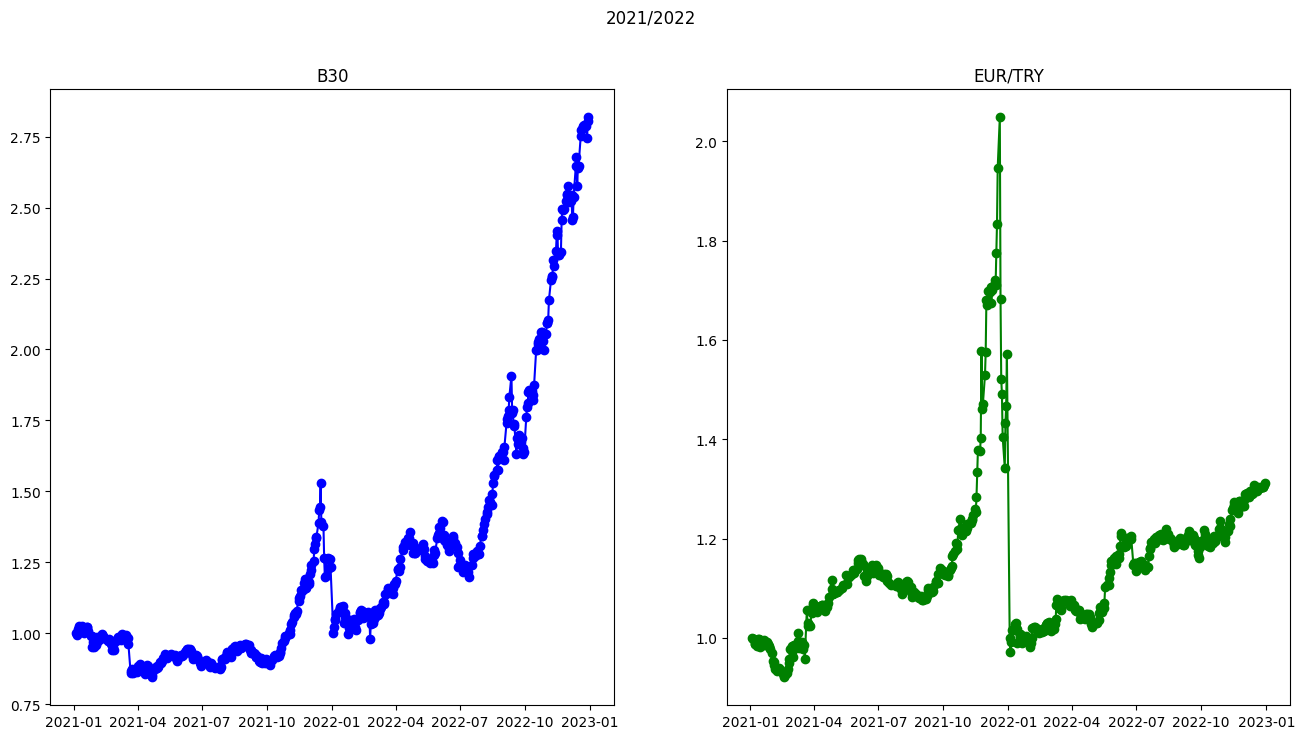

In [9]:
fig_1 = px.line(veriBirlesik, y =veriBirlesik['Normalize'],
                width = 1000,
                height=500,
                title='BIST30 Endeksi 2021/2022 - Normalize',
                hover_data={'Normalize' : ':.2f','Kapanış (TRY)' : ':.0f'},
                labels={'index':'Tarih','Normalize':'BIST30 Endeksi(TRY)'}
                )

          
fig_2 = go.Figure()
fig_2.add_trace(go.Bar(x=veriBirlesik.index,y=veriBirlesik['Normalize'],name ='Normalize B30'))
fig_2.add_trace(go.Scatter(x=veriBirlesik.index,y=veriBirlesik['Normalize EUR/TRY'],name='Normalize EUR/TRY'))
fig_2.update_layout(title = '2021/2022 - Normalize B30 ve Kur',
                   xaxis_title='Tarih',xaxis_dtick='M1',
                   yaxis_title='Kur Endeksi(EUR/TRY)',
                   width=1000, height=500)


fig_1.show()
fig_2.show()

fig_3=plt.figure()
x=veriBirlesik.index
y_1=veriBirlesik['Normalize']
y_2=veriBirlesik['Normalize EUR/TRY']

fig_3.set_figheight(8)
fig_3.set_figwidth(16)


plt.subplot(121)
plt.plot(x,y_1, color="blue", marker="o")
plt.title("B30")
 
plt.subplot(122)
plt.plot(x,y_2, color="green", marker="o")
plt.title("EUR/TRY")

plt.suptitle("2021/2022")
